In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


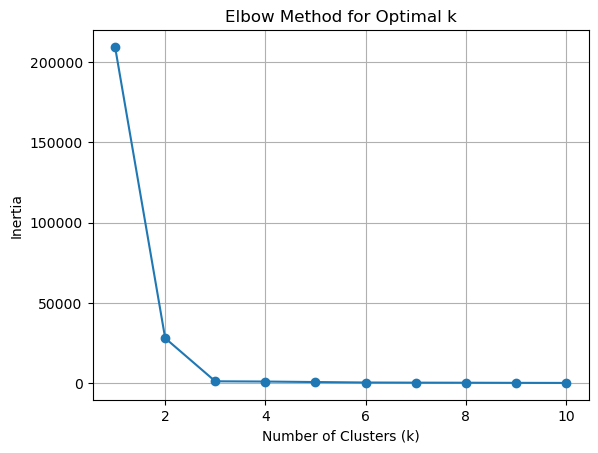

In [2]:
# Load the dataset
df = pd.read_csv("CuttingToolData.txt", delimiter="\t")

# Select features
X = df[['Cutting Speed (m/min)', 'Feed Rate (mm/rev)']]

# Run KMeans for a range of cluster numbers and calculate inertia (sum of squared distances to cluster centers)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

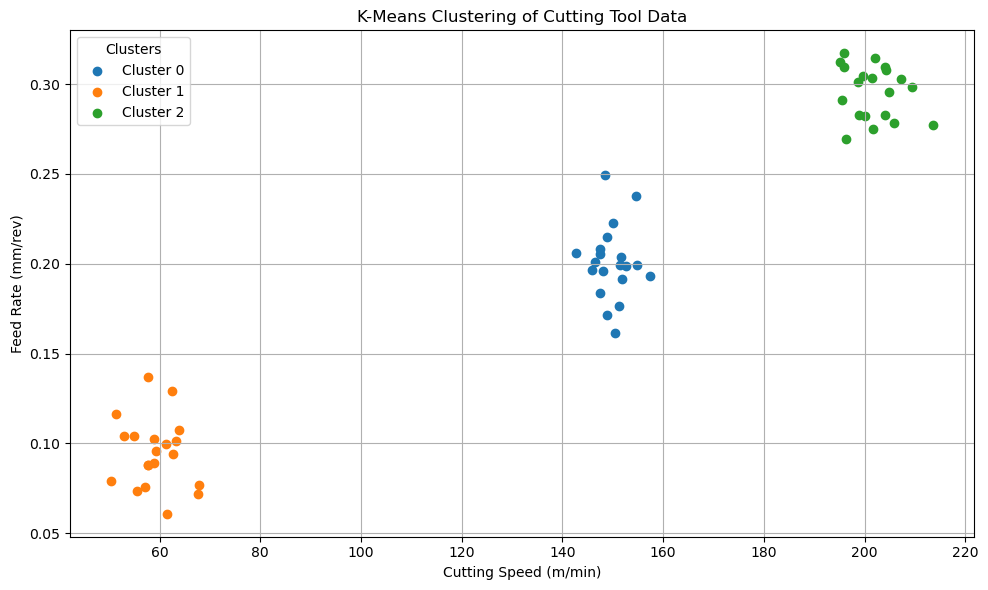

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Apply KMeans clustering (example: 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Plot each cluster separately with labels
plt.figure(figsize=(10, 6))
for cluster_id in range(3):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Cutting Speed (m/min)'],
                cluster_data['Feed Rate (mm/rev)'],
                label=f'Cluster {cluster_id}')

# Axis labels and title
plt.xlabel('Cutting Speed (m/min)')
plt.ylabel('Feed Rate (mm/rev)')
plt.title('K-Means Clustering of Cutting Tool Data')

# Add legend
plt.legend(title='Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()


There seem to be 3 main clusters representing:
- high speed and high feedrate
- mid speed and mid feedrate
- low speed and low feedrate

The new cutting tool belongs to cluster: 0


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


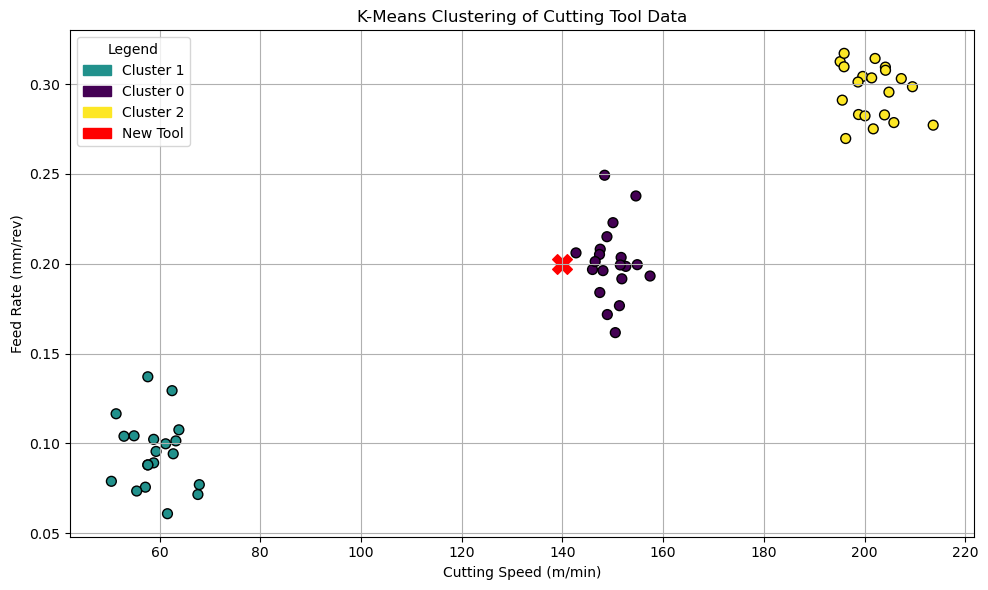

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Plot the clusters (same style, color-coded by cluster)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Cutting Speed (m/min)'],
                      X['Feed Rate (mm/rev)'],
                      c=df['Cluster'],
                      cmap='viridis',
                      s=50,
                      edgecolor='k',
                      label='Clusters')

# Create legend handles for clusters
unique_clusters = df['Cluster'].unique()
handles = [Patch(color=scatter.cmap(scatter.norm(c)), label=f'Cluster {c}') for c in unique_clusters]

# Predict cluster for new cutting tool
new_tool = [[140, 0.2]]
new_cluster = kmeans.predict(new_tool)[0]
print(f"The new cutting tool belongs to cluster: {new_cluster}")

# Plot the new tool
plt.scatter(new_tool[0][0], new_tool[0][1], c='red', marker='X', s=200, label='New Tool')

# Add new tool to legend
handles.append(Patch(color='red', label='New Tool'))

# Add labels and legend
plt.xlabel('Cutting Speed (m/min)')
plt.ylabel('Feed Rate (mm/rev)')
plt.title('K-Means Clustering of Cutting Tool Data')
plt.legend(handles=handles, title='Legend')
plt.grid(True)
plt.tight_layout()
plt.show()


# Hierarchical Clustering

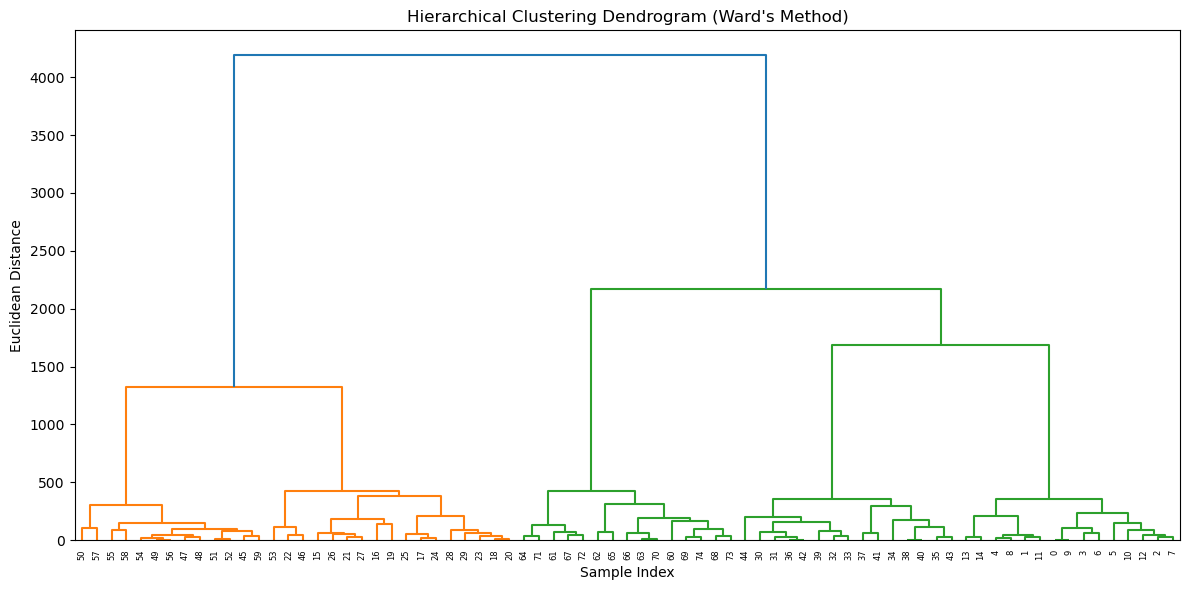

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
alloy_strength = pd.read_csv("AlloyStrengthData.txt", delimiter="\t")

# Select features
Y = alloy_strength[['Yield Strength (MPa)', 'Ultimate Tensile Strength (MPa)']]

# Perform hierarchical clustering
linkage_data = linkage(Y, method='ward', metric='euclidean')

# Plot dendrogram with labeled axes
plt.figure(figsize=(12, 6))
dendrogram(linkage_data)
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)")
plt.tight_layout()
plt.show()

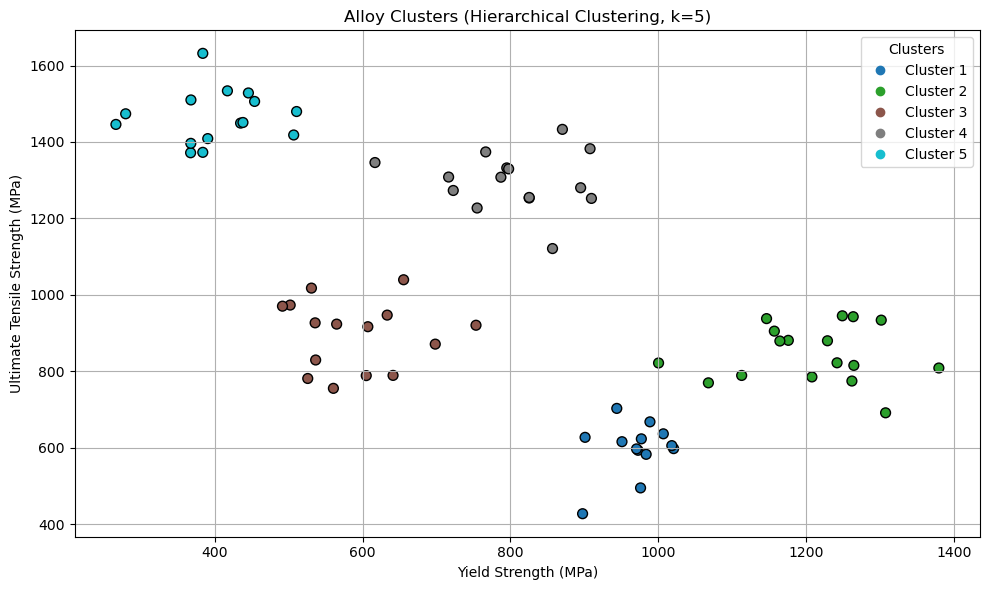

In [13]:
# Assign clusters — set number of clusters to 5
alloy_strength['Cluster'] = fcluster(linkage_data, t=5, criterion='maxclust')

# Plot scatter plot with clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    alloy_strength['Yield Strength (MPa)'],
    alloy_strength['Ultimate Tensile Strength (MPa)'],
    c=alloy_strength['Cluster'],
    cmap='tab10',  # color map for distinct cluster colors
    s=50,
    edgecolor='k'
)

plt.xlabel('Yield Strength (MPa)')
plt.ylabel('Ultimate Tensile Strength (MPa)')
plt.title('Alloy Clusters (Hierarchical Clustering, k=5)')
plt.grid(True)

# Optional: add legend
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f'Cluster {i}' for i in range(1, 6)], title="Clusters")

plt.tight_layout()
plt.show()

The new alloy belongs to cluster: 4


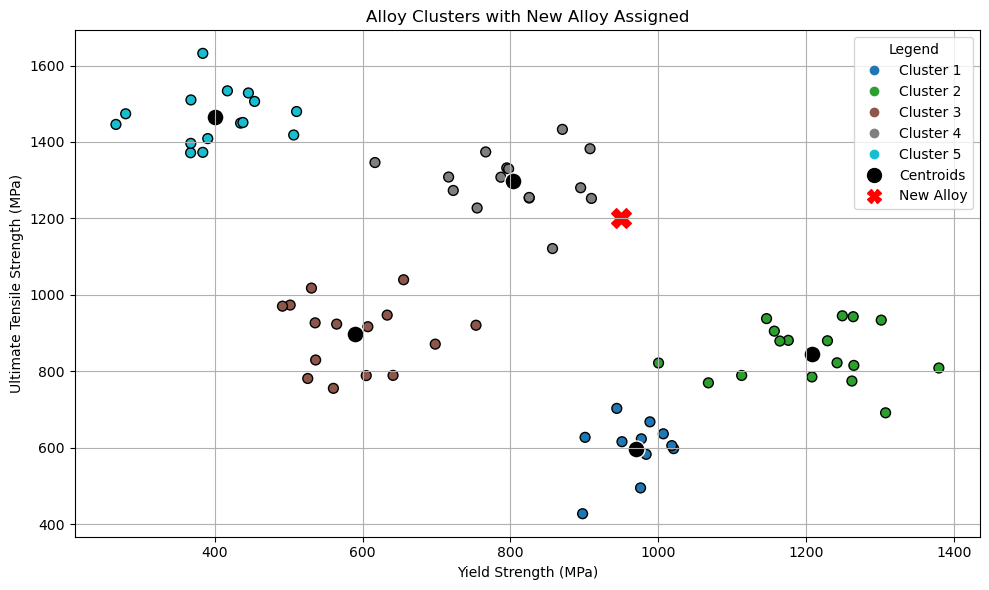

In [23]:
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt

# Compute cluster centroids manually
centroids = alloy_strength.groupby('Cluster')[['Yield Strength (MPa)', 'Ultimate Tensile Strength (MPa)']].mean()

# New alloy sample
new_alloy = [[950, 1200]]

# Calculate distances from new alloy to each cluster centroid
distances = cdist(new_alloy, centroids.values)
assigned_cluster = centroids.index[distances.argmin()]

print(f"The new alloy belongs to cluster: {assigned_cluster}")

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    alloy_strength['Yield Strength (MPa)'],
    alloy_strength['Ultimate Tensile Strength (MPa)'],
    c=alloy_strength['Cluster'],
    cmap='tab10',
    s=50,
    edgecolor='k'
)

# Plot centroids
plt.scatter(centroids['Yield Strength (MPa)'], centroids['Ultimate Tensile Strength (MPa)'],
            marker='o', s=150, c='black', label='Centroids', edgecolor='white')

# Plot new alloy
plt.scatter(new_alloy[0][0], new_alloy[0][1], c='red', marker='X', s=200, label='New Alloy')

# Create legend with cluster names
handles, _ = scatter.legend_elements(prop="colors")
cluster_labels = [f'Cluster {i}' for i in range(1, 6)]
handles.append(plt.Line2D([], [], marker='o', color='black', linestyle='', label='Centroids', markersize=10))
handles.append(plt.Line2D([], [], marker='X', color='red', linestyle='', label='New Alloy', markersize=10))
plt.legend(handles, cluster_labels + ['Centroids', 'New Alloy'], title='Legend')

# Labels and layout
plt.xlabel('Yield Strength (MPa)')
plt.ylabel('Ultimate Tensile Strength (MPa)')
plt.title('Alloy Clusters with New Alloy Assigned')
plt.grid(True)
plt.tight_layout()
plt.show()

# DBScan for Dimensional Accuracy

The new point is classified as an OUTLIER.
Number of clusters: 1
Number of noise points: 18


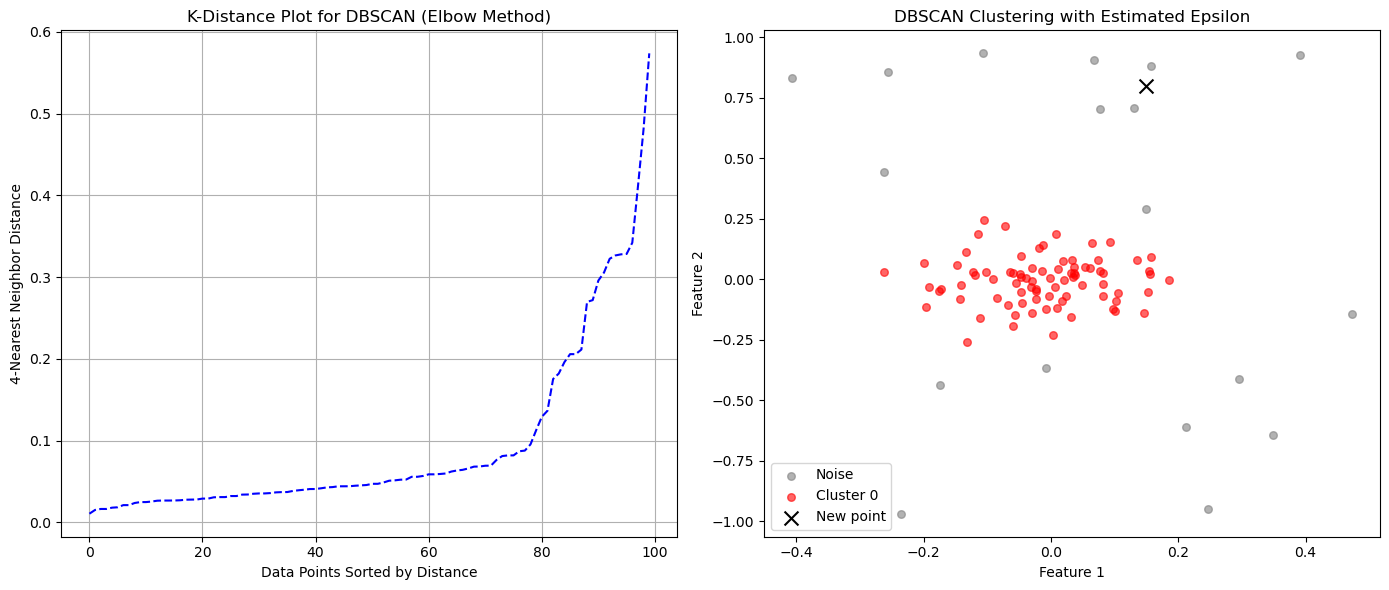

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

component_deviation = pd.read_csv("ComponentDeviationData.txt", delimiter="\t")

# Select features
Z = component_deviation[['Diameter Deviation (mm)', 'Length Deviation (mm)']]

# ---- Step 1: Find the optimal epsilon using the K-Distance Plot (Elbow Method) ----
minPts = 4  # Rule of thumb: minPts ≈ 2 * num_features

# Compute k-nearest neighbors distances (k = minPts-1)
neighbors = NearestNeighbors(n_neighbors=minPts)
neighbors_fit = neighbors.fit(Z)
distances, indices = neighbors_fit.kneighbors(Z)

# Sort distances of k-th nearest neighbor (minPts-1)
sorted_distances = np.sort(distances[:, minPts-1])

# ---- Step 2: Apply DBSCAN with an estimated epsilon ----
eps = 0.1  # Chosen based on the elbow point from the K-Distance plot
dbscan = DBSCAN(eps=eps, min_samples=minPts)
dbscan.fit(Z)

# Extract cluster labels
labels = dbscan.labels_
unique_labels = np.unique(labels)

# New data point
new_point = np.array([[0.15, 0.8]])
new_point_cluster = dbscan.fit_predict(np.vstack([Z, new_point]))[-1]
if new_point_cluster == -1:
    print(f'The new point is classified as an OUTLIER.')
else:
    print(f'The new point belongs to cluster {new_point_cluster}.')

# Identify and print the number of clusters (ignoring noise points)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters}')

# Print noise points (those labeled as -1)
n_noise_points = list(labels).count(-1)
print(f'Number of noise points: {n_noise_points}')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the K-Distance Graph
axes[0].plot(sorted_distances, linestyle='--', color='b')
axes[0].set_xlabel("Data Points Sorted by Distance")
axes[0].set_ylabel(f"{minPts}-Nearest Neighbor Distance")
axes[0].set_title("K-Distance Plot for DBSCAN (Elbow Method)")
axes[0].grid(True)

# Plot the clusters
for label in unique_labels:
    color = 'gray' if label == -1 else plt.cm.hsv(label / len(unique_labels))
    axes[1].scatter(Z.values[labels == label, 0], Z.values[labels == label, 1], color=color, alpha=0.6, s=30,
                     label=f'Cluster {label}' if label != -1 else 'Noise')
    
axes[1].scatter(new_point[0, 0], new_point[0, 1], marker='x', color='black', s=100, label='New point')
axes[1].set_title("DBSCAN Clustering with Estimated Epsilon")
axes[1].legend(fontsize=10)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()

The data shows 1 cluster of components that most likely have been manufactured up to sufficient tolerances. This means that all of the datapoint qualified as noise are most likely components that are out of spec and are potentially defective.

Suppose a new component is measured with a diameter deviation of 0.15 mm and a length deviation of 0.8 mm. Based on the chosen clustering criteria, this component would be qualified as potentially defective because it does not belong to the main cluster

# Logistic Regression for Failure Mode Determination

Accuracy: 0.9888888888888889
Confusion Matrix:
 [[35  0  0]
 [ 0 28  0]
 [ 0  1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      1.00      0.98        28
           2       1.00      0.96      0.98        27

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


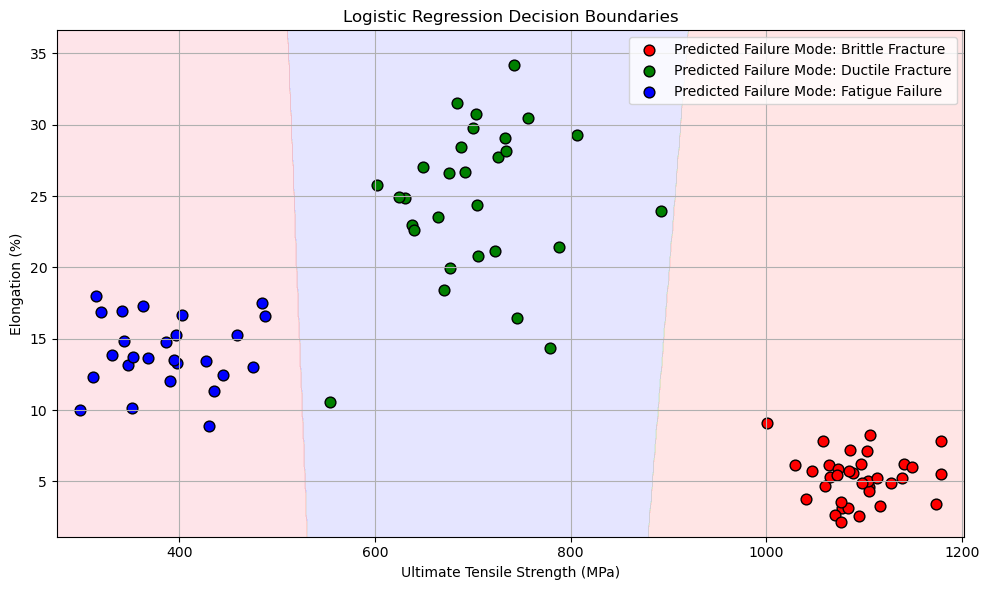

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# Load the dataset
failure_mode_data = pd.read_csv("FailureModeData.txt", delimiter="\t")

# Select features and target
A = failure_mode_data[['UTS (MPa)', 'Elongation (%)']]
B = failure_mode_data['Failure Mode']  # Use Series, not DataFrame

# --- Train/test split ---
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3, random_state=42)

# --- Train multinomial logistic regression model ---
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(A_train, B_train)

# --- Predict ---
B_pred = model.predict(A_test)

# --- Evaluate model ---
print("Accuracy:", accuracy_score(B_test, B_pred))
print("Confusion Matrix:\n", confusion_matrix(B_test, B_pred))
print("Classification Report:\n", classification_report(B_test, B_pred))

# --- Visualize decision boundaries ---
x_min, x_max = A['UTS (MPa)'].min() - 10, A['UTS (MPa)'].max() + 10
y_min, y_max = A['Elongation (%)'].min() - 1, A['Elongation (%)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 0.5))

# Predict on grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Unique classes and colormap
classes = model.classes_
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFF7AA', '#FDA7B7'])
cmap_bold = ['red', 'green', 'blue', 'orange', 'purple']

# Plot decision regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

failure_mode_label = ["Brittle Fracture", "Ductile Fracture", "Fatigue Failure"]

# Plot original points with predicted class color
for idx, class_label in enumerate(classes):
    plt.scatter(A_test[B_pred == class_label]['UTS (MPa)'],
                A_test[B_pred == class_label]['Elongation (%)'],
                c=cmap_bold[idx], label=f"Predicted Failure Mode: {failure_mode_label[class_label]}", edgecolor='k', s=60)

plt.xlabel('Ultimate Tensile Strength (MPa)')
plt.ylabel('Elongation (%)')
plt.title('Logistic Regression Decision Boundaries')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Now to predict the position of the new point:
- UTS: 900 MPa
- Elongation: 12%

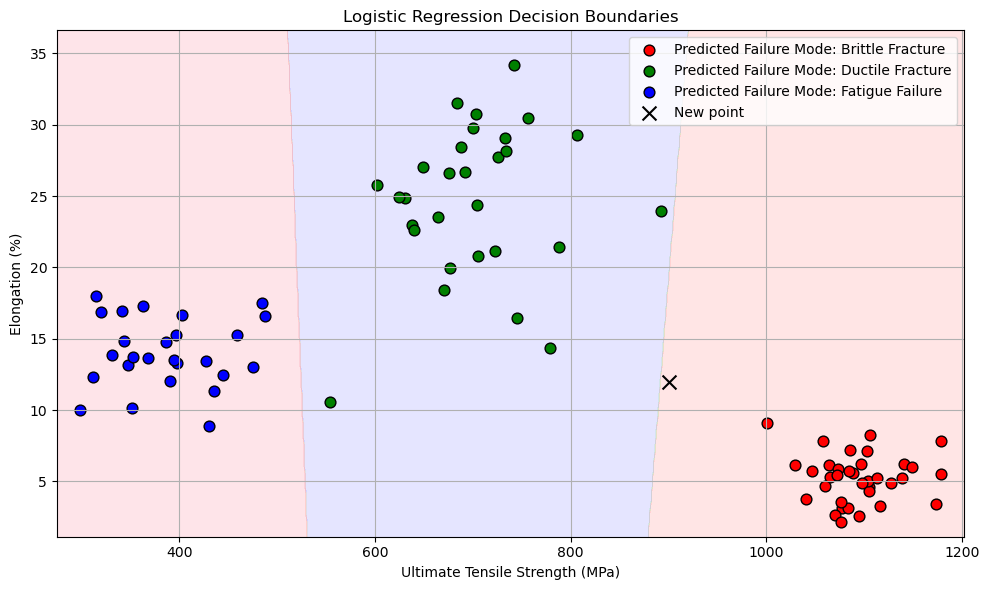

In [7]:
new_sample = [[900, 12]]

# Plot decision regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

failure_mode_label = ["Brittle Fracture", "Ductile Fracture", "Fatigue Failure"]

# Plot original points with predicted class color
for idx, class_label in enumerate(classes):
    plt.scatter(A_test[B_pred == class_label]['UTS (MPa)'],
                A_test[B_pred == class_label]['Elongation (%)'],
                c=cmap_bold[idx], label=f"Predicted Failure Mode: {failure_mode_label[class_label]}", edgecolor='k', s=60)

plt.xlabel('Ultimate Tensile Strength (MPa)')
plt.scatter(new_sample[0][0], new_sample[0][1], marker='x', color='black', s=100, label='New sample')
plt.ylabel('Elongation (%)')
plt.title('Logistic Regression Decision Boundaries')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Based on this plot, the sample is most likely to belong to the Brittle fracture cluster. However, it is very close to the regression borders for the clusters which means that the confidence on this choice is not very high.